## 1. height vs. career-high ranking

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

PROCESSED_DIR = 'processed'
playerList = os.path.join(PROCESSED_DIR, "processedList.csv")
playerDf = pd.read_csv(playerList, sep=',')
# remove players without ranking info
playerDf = playerDf[playerDf['rank_single_ch'].notna() & playerDf['height'].notna()]
playerDf
# dtype={'age_year': int, 'age_day': int, 'pro_year': int, 'height': int, 'hand': int, 'rank_single_ch': int}

,pid,birthday,age_year,age_day,ioc,first_name,last_name,pro_year,height,hand,rank_single_ch,rank_single_ch_date
0,P487,1981-06-27,41.0,113.0,FRA,Eric,Prodon,2000.0,180.0,1.0,83,2011-08-22
1,BD00,1982-03-31,40.0,201.0,MDA,Roman,Borvanov,2004.0,183.0,1.0,200,2011-10-24
2,KD70,1994-09-03,28.0,45.0,SRB,Pedja,Krstin,2012.0,183.0,1.0,159,2016-05-09
3,P353,1976-06-16,46.0,124.0,GER,Axel,Pretzsch,1996.0,185.0,1.0,99,2002-01-14
4,L0BV,2001-11-08,20.0,344.0,CZE,Jiri,Lehecka,2020.0,185.0,1.0,59,2022-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...
841,M614,1976-06-27,46.0,113.0,PHI,Cecil,Mamiit,1996.0,173.0,1.0,72,1999-10-11
842,SN54,1995-03-18,27.0,214.0,POR,Frederico,Ferreira Silva,2013.0,178.0,2.0,168,2021-05-24
843,BC11,1987-02-10,35.0,250.0,UKR,Sergei,Bubka,2005.0,188.0,1.0,145,2011-11-14
844,O133,1978-04-16,44.0,185.0,ISR,Noam,Okun,1996.0,185.0,1.0,95,2002-04-22


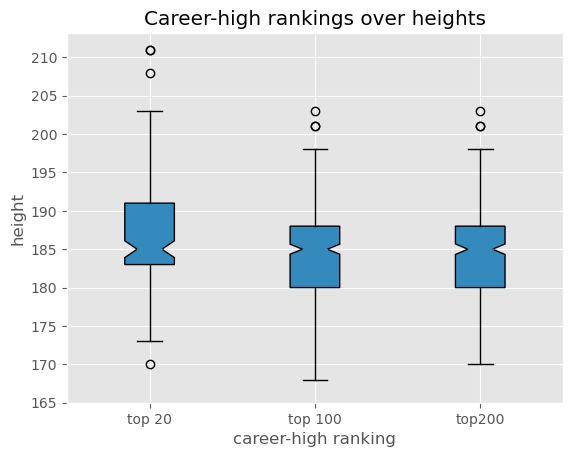

In [111]:
playerDf = playerDf[playerDf['height'] > 100]
top20df = playerDf[playerDf['rank_single_ch'] <= 20]['height']
top100df = playerDf[(playerDf['rank_single_ch'] <= 100) & (playerDf['rank_single_ch'] > 20)]['height']
othersdf = playerDf[playerDf['rank_single_ch'] > 100]['height']

data = [list(top20df), list(top100df), list(othersdf)]
# Create the box plot
plt.style.use('ggplot')

plt.boxplot(data, patch_artist=True, notch=True)
# Customize the plot (optional)
plt.title('Career-high rankings over heights')
plt.xlabel('career-high ranking')
plt.ylabel('height')
plt.xticks([1, 2, 3], ['top 20', 'top 100', 'top200'])
plt.yticks(range(165, 215, 5))
plt.show()

In [3]:
print("TOP 20:")
print(top20df.describe())
print("\n\n")
print("TOP 100:")
print(top100df.describe())
print("\n\n")
print("Others:")
print(othersdf.describe())

TOP 20:
count    131.000000
mean     187.297710
std        7.446935
min      170.000000
25%      183.000000
50%      185.000000
75%      191.000000
max      211.000000
Name: height, dtype: float64



TOP 100:
count    373.000000
mean     184.450402
std        6.395633
min      168.000000
25%      180.000000
50%      185.000000
75%      188.000000
max      203.000000
Name: height, dtype: float64



Others:
count    336.000000
mean     184.494048
std        5.987048
min      170.000000
25%      180.000000
50%      185.000000
75%      188.000000
max      203.000000
Name: height, dtype: float64


## 2. lefty vs. righty

In [94]:
lefty = playerDf[playerDf['hand'] == 2.0]
righty = playerDf[playerDf['hand'] == 1.0]
numLeft = len(lefty)
numRight = len(righty)
print('righty players: %d, %0.1f %%'%(numRight, 100 * numRight / (numRight + numLeft)))
print('lefty players:  %d, %0.1f %%'%(numLeft, 100 * numLeft/(numLeft + numRight) )) 

righty players: 725, 86.3 %
lefty players:  115, 13.7 %


In [97]:
matches = os.path.join(PROCESSED_DIR, "processedMatches.csv")
matches_df = pd.read_csv(matches, sep=',')
matches_df = matches_df[matches_df['pid'].notna() & matches_df['o_id'].notna() & matches_df['start'].notna()]
# remove duplicates
matches_df['sorted_pairs'] = matches_df.apply(lambda row: tuple(sorted([row['pid'], row['o_id'], row['start']])), axis=1)
print("before removing duplicates", len(matches_df))
# Remove duplicate rows based on the 'sorted_pairs' column
matches_df = matches_df.drop_duplicates(subset='sorted_pairs').drop(columns='sorted_pairs')
print("after removing duplicates", len(matches_df))

before removing duplicates 474739
after removing duplicates 323381


In [98]:
# righty win percentage, winOverRighty, winOverLefty
s_matches_df = matches_df
leftyID = list(lefty['pid'])
rightyID = list(righty['pid'])
landr = s_matches_df[(s_matches_df['pid'].isin(leftyID)) & (s_matches_df['o_id'].isin(rightyID))]
randl = s_matches_df[(s_matches_df['pid'].isin(rightyID)) & (s_matches_df['o_id'].isin(leftyID))]
# righty vs. lefty
rldf = pd.concat([landr, randl])
# righty vs. righty
rrdf = s_matches_df[(s_matches_df['pid'].isin(rightyID)) & (s_matches_df['o_id'].isin(rightyID))]
#print(len(randldf), len(randrdf))
LR_MIN = 10
winOverRighty = []
winOverLefty = []
filteredID = []
allLeftyMatches = []
for rid in rightyID:
    allLR = len(rldf[rldf['pid'] == rid]) + len(rldf[rldf['o_id'] == rid])
    if allLR >= LR_MIN:
        winLR = len(rldf[rldf['pid'] == rid][rldf['wl'] == 'W']) + len(rldf[rldf['o_id'] == rid][rldf['wl'] == 'L'])
        winOverLefty.append(winLR/ allLR)
        allRR = len(rrdf[rrdf['pid'] == rid]) + len(rrdf[rrdf['o_id'] == rid])
        winRR = len(rrdf[rrdf['pid'] == rid][rrdf['wl'] == 'W']) + len(rrdf[rrdf['o_id'] == rid][rrdf['wl'] == 'L'])
        winOverRighty.append(winRR / allRR)
        filteredID.append(rid)
        allLeftyMatches.append(allLR)

/var/folders/3w/s6x8d3hs02n89t530hlr93gh0000gn/T/ipykernel_37729/3820558323.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winLR = len(rldf[rldf['pid'] == rid][rldf['wl'] == 'W']) + len(rldf[rldf['o_id'] == rid][rldf['wl'] == 'L'])
/var/folders/3w/s6x8d3hs02n89t530hlr93gh0000gn/T/ipykernel_37729/3820558323.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winRR = len(rrdf[rrdf['pid'] == rid][rrdf['wl'] == 'W']) + len(rrdf[rrdf['o_id'] == rid][rrdf['wl'] == 'L'])


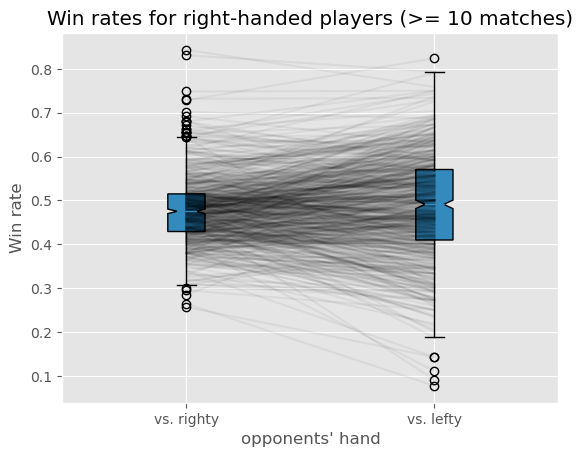

In [99]:
# Combine the lists into a single list of lists
data = [winOverRighty, winOverLefty]

# Create the box plot
bp = plt.boxplot(data, notch=True, patch_artist=True)  # Use notch=True to create notched box plots, indicating the paired nature of the data

# Draw lines between paired points
for i, (a, b) in enumerate(zip(winOverRighty, winOverLefty)):
    plt.plot([1, 2], [a, b], color='black', alpha=0.05)

# Customize the plot (optional)
plt.title('Win rates for right-handed players (>= 10 matches)')
plt.xlabel('opponents\' hand')
plt.ylabel('Win rate')
plt.xticks([1, 2], ['vs. righty', 'vs. lefty'])

# Display the plot
plt.show()



In [100]:
import altair as alt

first_name = []
last_name = []
ch_rk = []
top10 = []

for fid in filteredID:
    nowPlayer = playerDf[playerDf['pid'] == fid]
    ch_rk.append(nowPlayer['rank_single_ch'].iloc[0])
    first_name.append(nowPlayer['first_name'].iloc[0])
    last_name.append(nowPlayer['last_name'].iloc[0])
    top10.append(nowPlayer['rank_single_ch'].iloc[0] <= 10)
    
wrDf = pd.DataFrame(data={'first_name': first_name, 'last_name': last_name, 
                          'rank_single_ch': ch_rk, 'vs_righty': [round(item, 3) for item in winOverRighty], 
                          'vs_lefty': [round(item, 3) for item in winOverLefty], 'top10': top10, 
                          'num_lefty_matches': allLeftyMatches})

bar = len(wrDf[wrDf['vs_righty'] > wrDf['vs_lefty']])

print('%d of %d (%0.1f%%) players have lower win rate against lefties'%(bar, len(wrDf), 100 * bar/len(wrDf)))

310 of 671 (46.2%) players have lower win rate against lefties


In [101]:
line = pd.DataFrame({
    'vs_lefty': [0, 1],
    'vs_righty': [0, 1],
})

line_plot = alt.Chart(line).mark_line(color= 'red').encode(
    x= 'vs_lefty',
    y= 'vs_righty')

alt.Chart(wrDf, title="win rate vs. righty and lefty").mark_circle(size=60).encode(
        alt.X('vs_lefty',
        scale=alt.Scale(zero=True)
        ),
        alt.Y('vs_righty',
        scale=alt.Scale(zero=True)
        ),
        color='top10',
        tooltip=['first_name', 'last_name', 'rank_single_ch', 'vs_righty', 'vs_lefty', 'num_lefty_matches']
).interactive() + line_plot

alt.LayerChart(...)

## 3. three sets

In [130]:
# first 80 matches are 3 sets
allIds = list(playerDf['pid'])
allMatches = []
cutOff = 80
threeSets = []
jerryID = 'S0RE'
jerry3sets = 0
for pid in allIds:
    curFirst = pd.concat([matches_df[matches_df['pid'] == pid], matches_df[matches_df['o_id'] == pid]]).sort_values(by=['start'])[:cutOff]
    curFirst = curFirst[curFirst['games'].notna()]
    curFirst['3sets'] = curFirst.apply(lambda row: row['games'].count('-') == 3, axis=1)
    allMatches.append(curFirst)
    threeSets.append(len(curFirst[curFirst['3sets'] == True])/len(curFirst))
    if pid == jerryID:
        jerry3sets = threeSets[-1]

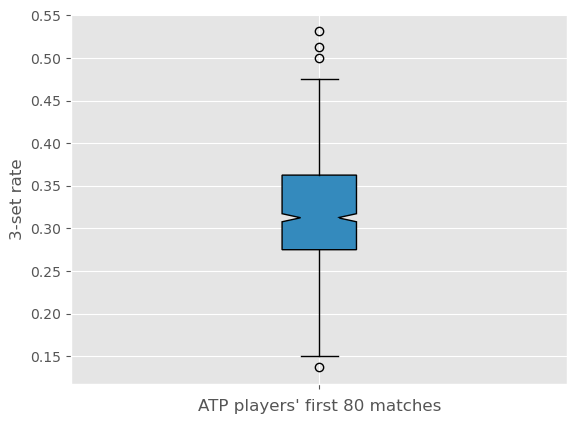

Juncheng Shang:  0.4125 percentile:  92.5
count    840.000000
mean       0.317625
std        0.062511
min        0.137500
25%        0.275000
50%        0.312500
75%        0.362500
max        0.531646
Name: 3sets, dtype: float64


In [132]:
from scipy.stats import percentileofscore
data = [threeSets]
# Create the box plot
bp = plt.boxplot(data, notch=True, patch_artist=True)  # Use notch=True to create notched box plots, indicating the paired nature of the data

# Customize the plot (optional)
plt.title('')
plt.xlabel('ATP players\' first 80 matches')
plt.ylabel('3-set rate')
plt.xticks([1], [''])

# Display the plot
plt.show()

threedf = pd.DataFrame(data={'3sets': threeSets})
percentile = percentileofscore(threeSets, jerry3sets)
print("Juncheng Shang: ", jerry3sets, "percentile: ", percentile)
print(threedf['3sets'].describe())

In [138]:
playerDf['3sets'] = threeSets
playerDf['top20'] = playerDf.apply(lambda row: row['rank_single_ch'] <= 20, axis=1)
alt.Chart(playerDf, title="3sets and career-high ranking").mark_circle(size=60).encode(
        alt.X('3sets',
        scale=alt.Scale(zero=True)
        ),
        alt.Y('rank_single_ch',
        scale=alt.Scale(zero=True)
        ),
        color='top20',
        tooltip=['first_name', 'last_name', 'rank_single_ch', '3sets']
).interactive()

alt.Chart(...)

ValueError: Expected a 1D array, got an array with shape (840, 13)